### Шмидт Ян, 304 гр., 2023, Вариант 9

Из условия: $$\xi = \dfrac{1}{11}, \quad A = \dfrac{1}{15}, \quad B = \dfrac{1}{25}$$
Система ОДУ:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ \dfrac{dy_2(x)}{dx}=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$
Такой вопрос: $$x_k = \pi\\ y_1(x_k) = ?\\ y_2(x_k) = ?$$

Поскольу все уравнения системы можно считать равноправными, то запишем так:

Для первого уравнения:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ y_1(x_0)=B\pi\\ y_1(x_k) = ?$$
Для второго уравнения:
$$\dfrac{dy_2(x)}{dx}=-By_2(x)\\ y_2(x_0)=A\pi\\ y_2(x_k) = ?$$

# Часть 1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

## Справочная информация

### Что такое явный метод Рунге-Кутты (ЯМРК)?

![image](./images/ЯМРК.png)
где $b_i, c_i, a_{ij}$ — заданные вещественные постоянные

### Что такое порядок ЯМРК?

![image](./images/порядокЯМРК.png)

### Определение локальной (методической) погрешности. Как производится выбор $b_i, c_i, a_{ij}$?

![image](./images/ЯМРК-теория2.png)

### Обобщение метода Рунге-Кутты на случай систем ОДУ

![image](./images/ODEsystem.png)

## Часть 1.1. Построить 2х-этапного ЯМРК 2-го порядка при значении параметра $c=\xi$ (параметр $\xi$ указан в варианте).

![image](./images/двухэтапЯМРК.png)

In [155]:
import numpy as np
import matplotlib.pyplot as plt

### Посчитаем необходимые величины и коэффициенты

In [191]:
xi, A, B = 1/11, 1/15, 1/25

t0 = 0
pi = np.pi
tk = pi

N = 100
nodes = np.linspace(t0, tk, N)
h = (tk - t0) / len(nodes)
print(f'Число узлов разбиения: {N}, \nвеличина постоянного шага h: {h}')

c2 = xi
a21 = c2
b1 = 1 - 1/(2*c2)
b2 = 1/(2*c2)
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')

Число узлов разбиения: 100, 
величина постоянного шага h: 0.031415926535897934

Для двухэтапного метода Рунге-Кутты: 
c2 = 0.09090909090909091, 
a21 = 0.09090909090909091, 
b1 = -4.5, 
b2 = 5.5


### Точное решение системы ОДУ из задания 

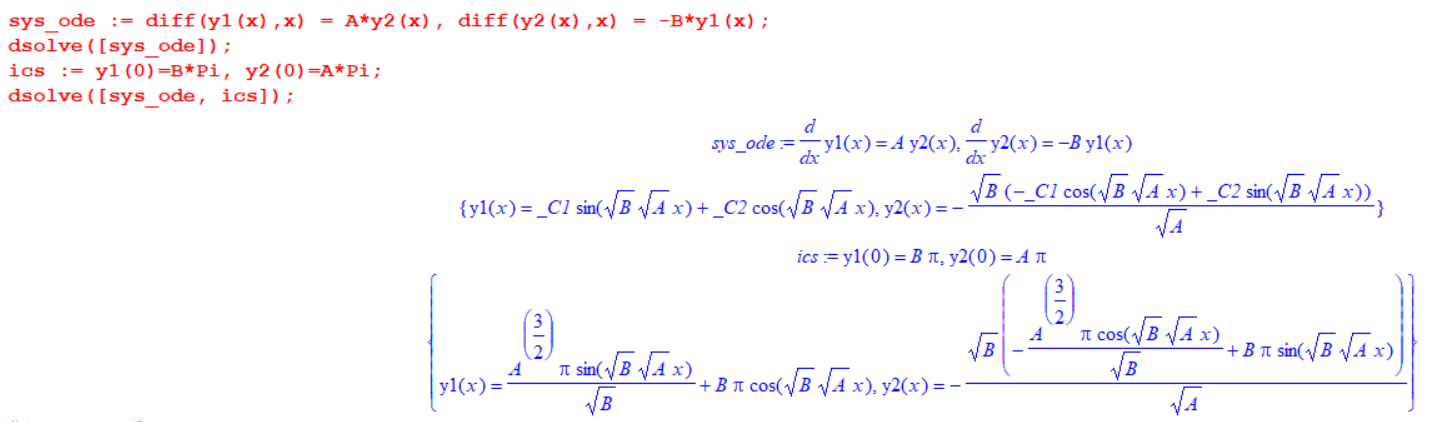

In [178]:
def y1(x):
    srt = np.sqrt(A*B)
    return ((A**(3/2))*pi*np.sin(srt*x)) / np.sqrt(B) + B*pi*np.cos(srt*x)

def y2(x):
    srt = np.sqrt(A*B)
    return (-1)*(np.sqrt(B/A))*(-(A**(3/2))*pi*np.cos(srt*x) / np.sqrt(B) + B*pi*np.sin(srt*x))

### Графики решений

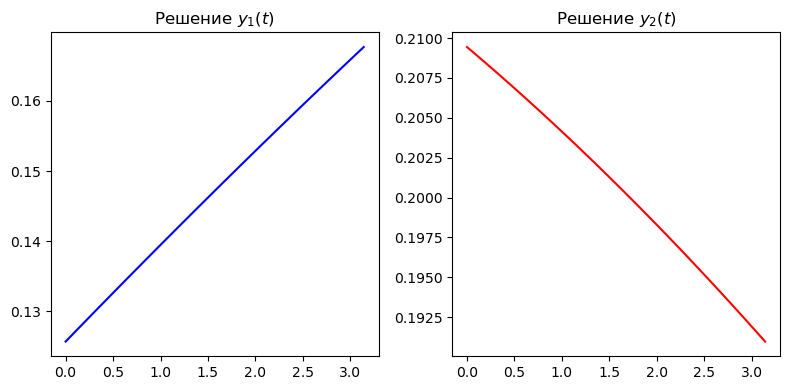

In [189]:
fig = plt.subplots(1, 2, figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(nodes,y1(nodes), color='blue')
plt.title('Решение $y_1(t)$')

plt.subplot(1, 2, 2)
plt.plot(nodes, y2(nodes), color='red')
plt.title('Решение $y_2(t)$')
plt.tight_layout()
plt.show()

$$y_i(x_k) = y_i(\pi) = ?\\ i=\overline{1,2}$$

In [181]:
print(f'Точное решение поставленной задачи Коши: \ny_1(x_k) = {y1(pi)}, \ny_2(x_k) = {y2(pi)}')

Точное решение поставленной задачи Коши: 
y_1(x_k) = 0.16768641025029876, 
y_2(x_k) = 0.19096724683765257


## 2х-этапный ЯМРК 2 порядка (для первого уравнения системы)

После применения ЯМРК: [0.12566371 0.13207895 0.13849419 0.14490943 0.15132468 0.15773992
 0.16415516 0.17057041 0.17698565 0.18340089 0.18981613 0.19623138
 0.20264662 0.20906186 0.21547711 0.22189235 0.22830759 0.23472283
 0.24113808 0.24755332 0.25396856 0.26038381 0.26679905 0.27321429
 0.27962953 0.28604478 0.29246002 0.29887526 0.30529051 0.31170575
 0.31812099 0.32453623 0.33095148 0.33736672 0.34378196 0.35019721
 0.35661245 0.36302769 0.36944293 0.37585818 0.38227342 0.38868866
 0.39510391 0.40151915 0.40793439 0.41434963 0.42076488 0.42718012
 0.43359536 0.44001061 0.44642585 0.45284109 0.45925633 0.46567158
 0.47208682 0.47850206 0.48491731 0.49133255 0.49774779 0.50416303
 0.51057828 0.51699352 0.52340876 0.52982401 0.53623925 0.54265449
 0.54906973 0.55548498 0.56190022 0.56831546 0.57473071 0.58114595
 0.58756119 0.59397643 0.60039168 0.60680692 0.61322216 0.61963741
 0.62605265 0.63246789 0.63888314 0.64529838 0.65171362 0.65812886
 0.66454411 0.67095935 0.67737459 0.683

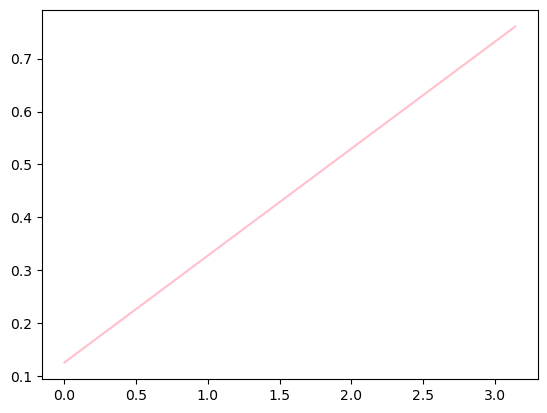

In [186]:
y = np.zeros(N)
y[0] = B*pi
# y(t) : y(t0=0) = B*pi
    
# ЯМРК 2-го порядка
for k in range (0, N-1):
#     k1 = h*A*y(t)
#     k2 = h*y(t), x(t) + a21*h, y(t) + a21*h
#     k2 = h*y(t), y(t) + a21*k1
    
    y[k+1] = y[k] + b1*k1 + b2*k2
print(f'После применения ЯМРК: {y}')
plt.plot(nodes, y, color='pink')
plt.show()

## Часть 1.2. Решение задачи Коши с заданной точностью ($\varepsilon = 10e-4$) с постоянным шагом интегрирования и оценкой полной погрешности по методу Рунге. Начальный шаг выбирать согласно алгоритму выбора начального шага (стр. 15 методического пособия).

# Часть 2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

## Часть 2.1. Решение задачи Коши на базе построенной в части  1.1 схемы 2х-этапного ЯМРК 2-го порядка с автоматическим выбором шага с заданной максимально допустимой локальной погрешностью ($\rho=10e-5$) и оценкой локальной погрешности по методу Рунге. Начальный шаг выбирать так же, как и в части 1.2.

# Часть 3. Анализ эффективности методов Рунге-Кутты

## Часть 3.1. Решение задачи Коши с постоянным и автоматическим выбором шага на базе одной из классических расчетных схем интегрирования 3-го или 4-го порядка точности: формулы (36), (37), (39), (40).

### (36) — первый вариант 3х-этапного ЯМРК 3-го порядка (точности)
![image](./images/трехэтапЯМРК1.png)

### (37) — второй вариант 3х-этапного ЯМРК 3-го порядка
![image](./images/трехэтапЯМРК2.png)

### (39) — 4х-этапный метод Рунге-Кутты 4-го порядка — классический метод Рунге-Кутты, или правило одной шестой
![image](./images/КлассичМетодРК.png)

### (40) — 4х-этапный метод Рунге-Кутты 4-го порядка — формула Гилла
![image](./images/формулаГилла.png)

## Часть 3.2. Для выбранного метода (схемы оппонента) из части 3.1 и реализованного Вами в части 1.2 2х-этапного ЯМРК 2-го порядка для решения задачи Коши с постоянным шагом определите величину шага интегрирования $h$, обеспечивающего вычисление приближенного решения с заданной точностью ($\varepsilon = 10^{-4}$). Постройте графики зависимости истинной полной погрешности от значения независимой переменной $x$ при интегрировании с полученным шагом $h$.

## Часть 3.3. Для схемы оппонента из части 3.1 и реализованного Вами в части 2.1 2х этапного ЯМРК 2-го порядка для решения задачи Коши с автоматическим выбором шага интегрирования постройте:

### Часть 3.3.1 графики зависимости величины шага интегрирования от значения независимой переменной $x$

### Часть 3.3.2 графики зависимости отношения истинной локальной погрешности к полученной оценке локальной погрешности от значения независимой переменной $x$ (см. формулу (91) в методичке).

### Формула (91): $$\delta_{j+1}^\varepsilon = \dfrac{l_{j+1}}{h_{j \varepsilon}}$$

### Часть 3.3.3 графики зависимости количества вычислений правой части системы от заданной точности $\varepsilon$ (например, $\varepsilon = [10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}]$).